# This script demonstrates Polynomial fit with a regularization

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github : https://github.com/Eun0/Assignment

# Import packages for plotting graphs and manipulating data :

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Define fun(x) function : 

True function

In [4]:
def fun(x):
 
    # f = np.sin(x) * (1 / (1 + np.exp(-x))) 
    f = np.abs(x) * np.sin(x)

    return f

# Make noisy data :

In [96]:
num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data


n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)            # clean points
y2      = y1 + nn * std     # noisy points

# Plot true function and noisy data :

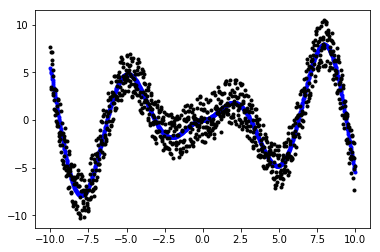

In [97]:
plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

We use a model 

$\hat{f}(x;\theta)=\theta_{0}x^0+\theta_1x^1+...+\theta_px^p$

with $\theta$=($\theta_0,\theta_1,...,\theta_p$)

In matrix form,

$A=\begin{pmatrix}
 1&  x_1&  ....&  x_1^p& \\ 
 1&  x_2&  ....&  x_2^p& \\ 
 :&  :&  :&  :& \\ 
 :&  :&  :&  :& \\ 
 1&  x_n&  ....&  x_n^p& 
\end{pmatrix}$

Our goal is to find an optimal set of model parameters that provide the least square approximate solution:

$\varepsilon(\theta;\lambda)=\left \| A\theta-y \right \|_2^2+\lambda \left \| \theta \right \|_2^2$

It is equal to the following equation

$ \varepsilon(\theta:\lambda)=\left \| \begin{pmatrix}
 A \\ 
 \sqrt{\lambda}I
\end{pmatrix}\theta- \begin{pmatrix}
 y \\ 
 \varnothing 
\end{pmatrix} \right \|_2^2 $

Least square problem! We can solve it!

# Define solve(x,y,p,lamb) function :

we set  $\tilde{A}=\begin{pmatrix}
 A \\ 
 \sqrt{\lambda}I
\end{pmatrix}$,  $\tilde{b}=\begin{pmatrix}
 y \\ 
\varnothing 
\end{pmatrix}$

This function return 

$\theta$(optimal set of model parameter), $A$, $\tilde{A}$, $\tilde{b}$

In [99]:
def solve(x,y,p,lamb):
    
     # Define A matrix
    A=np.empty((len(x),p))

    for i in range(A.shape[1]):
        A[:,i]=np.power(x,i)
    
    A_tilde=np.vstack((A,np.sqrt(lamb)*np.identity(p)))
    
    b_tilde=np.concatenate((y,np.zeros(p)),axis=0)
    
    theta=np.linalg.lstsq(A_tilde,b_tilde,rcond=-1)[0]
    
    return theta,A,A_tilde,b_tilde
        

# Plot tye polynomial curves that fit the noisy data by the least square error with varying p=6,7,...15

We fix $\lambda$=1

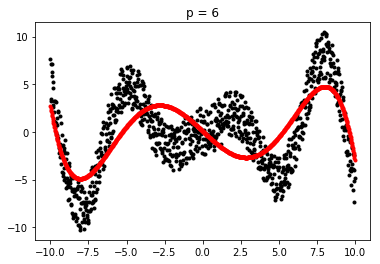

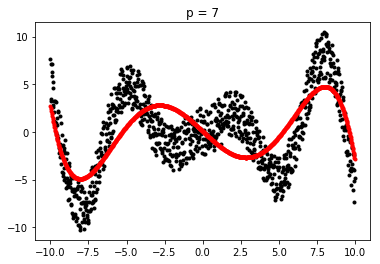

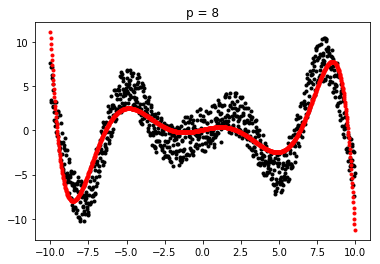

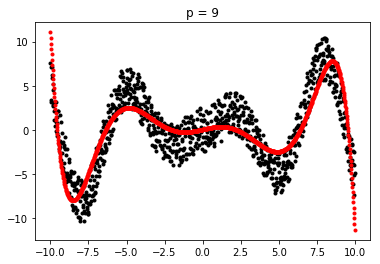

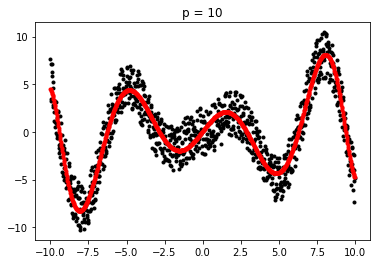

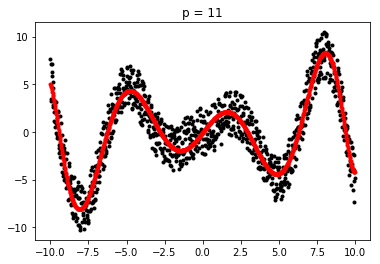

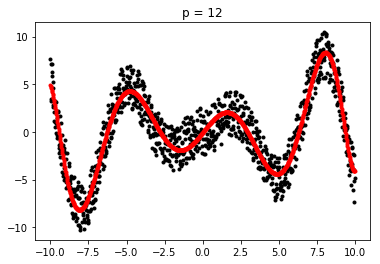

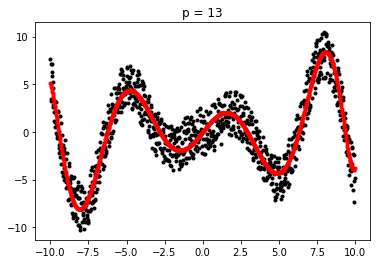

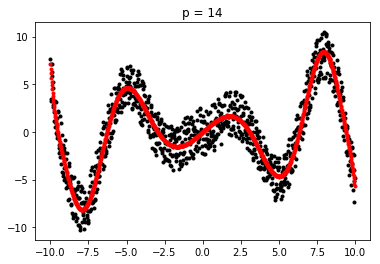

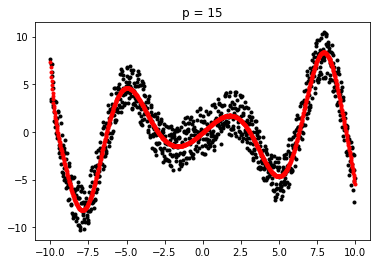

In [100]:

lamb=1

plt.figure(1)


for i in range(6,16):
    
    theta,A,_,_=solve(x,y2,i,lamb)
    y_hat=np.matmul(A,theta)

    plt.title("p = "+str(i))
    plt.plot(x,y2,'k.',x,y_hat,'r.')
    

    plt.show()

# Plot the polynomial curves that fit the noisy data by the least square error and Compute the errors 

# with varying $\lambda= 2^{-50},2^{-30},...,2^{50}$

We fix p=10

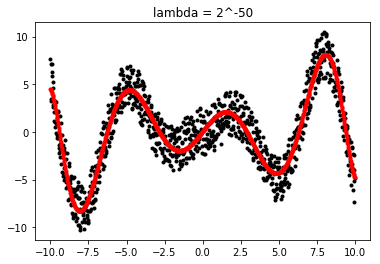

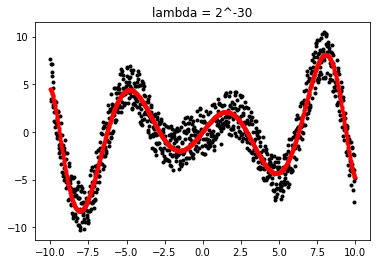

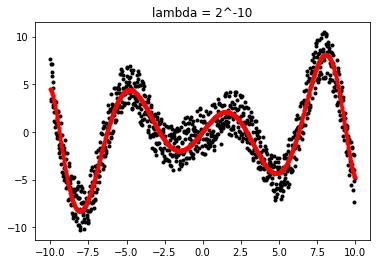

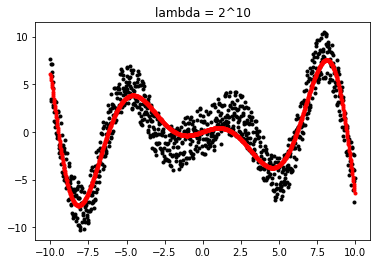

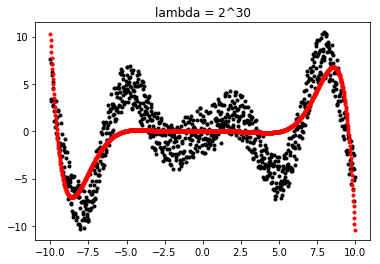

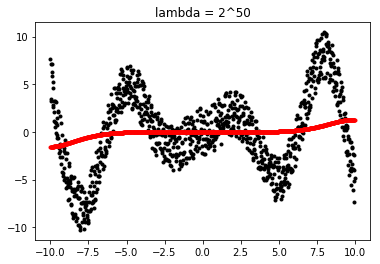

In [105]:

p=10

lst_error=[]

plt.figure(1)


for i in range(-50,70,20):
    
    theta,A,A_tilde,b_tilde=solve(x,y2,p,pow(2,i))
    y_hat=np.matmul(A,theta)
    
    error=np.linalg.norm(np.matmul(A_tilde,theta)-b_tilde,2)
    
    lst_error.append(error)

    plt.title("lambda = 2^"+str(i))
    plt.plot(x,y2,'k.',x,y_hat,'r.')
    
    
    

    plt.show()

# Plot the energy with varying $\lambda$ :

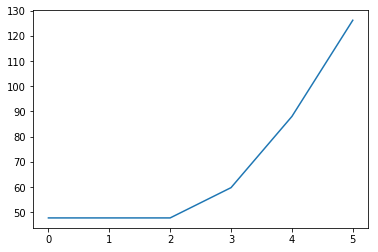

In [108]:
plt.plot(lst_error)